In [1]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [2]:
train_main = pd.read_csv("../data/task1/train_1.7.csv", encoding="cp1251")
test_main = pd.read_csv("../data/task1/test_1.9.csv", encoding="cp1251")

train_aux_coords = pd.read_csv("../data/task1_additional/coords_train_1.1.csv", encoding="cp1251")
test_aux_coords = pd.read_csv("../data/task1_additional/coords_train_1.1.csv", encoding="cp1251")

train_aux_frac = pd.read_csv("../data/task1_additional/frac_train_1.csv", encoding="cp1251")
test_aux_frac = pd.read_csv("../data/task1_additional/frac_test_1.csv", encoding="cp1251")

train_aux_gdis = pd.read_csv("../data/task1_additional/gdis_train1.2.csv", encoding="cp1251")
test_aux_gdis = pd.read_csv("../data/task1_additional/gdis_test1.2.csv", encoding="cp1251")

In [23]:
#sort by converted date and group
def convert_and_sort(df):
    df["Дата"] =  df["Дата"].apply(pd.to_datetime)
    df.sort_values(by=["Скважина", "Дата"], inplace=True)
    
convert_and_sort(train_main)

In [27]:
train_main.head(30)

,Скважина,Дата,ГТМ,Метод,Характер работы,Состояние,"Время работы, ч",Время накопления,"Попутный газ, м3","Закачка, м3","Природный газ, м3","Газ из газовой шапки, м3","Конденсат, т","Простой, ч",Причина простоя,"Приемистость, м3/сут","Обводненность (вес), %",Дебит конденсата,"Добыча растворенного газа, м3","Дебит попутного газа, м3/сут",Пласт МЭР,Куст,Тип скважины,Диаметр экспл.колонны,Диаметр НКТ,Диаметр штуцера,Глубина верхних дыр перфорации,Удлинение,Способ эксплуатации,Тип насоса,Производительность ЭЦН,Напор,Частота,Коэффициент сепарации,Глубина спуска,Буферное давление,Давление в линии,Пластовое давление,Динамическая высота,Затрубное давление,Давление на приеме,Забойное давление,Обводненность,Состояние на конец месяца,Давление наcыщения,Газовый фактор,Температура пласта,SKIN,JD факт,Дата ГРП,Вязкость нефти в пластовых условиях,Вязкость воды в пластовых условиях,Вязкость жидкости в пласт. условиях,объемный коэффициент,Плотность нефти,Плотность воды,Высота перфорации,Удельный коэффициент,Коэффициент продуктивности,ТП - Забойное давление,ТП - JD опт.,ТП - SKIN,К пр от стимуляции,Глубина спуска.1,КВЧ,Время до псевдоуст-ся режима,Причина простоя.1,Дата запуска после КРС,Дата пуска,Дата останова,Радиус контура питания,Мероприятия,Номер бригады,Фонтан через насос,Нерентабельная,Неустановившийся режим,Дата ввода в эксплуатацию,Назначение по проекту,Замерное забойное давление,Группа фонда,Нефтенасыщенная толщина,Плотность раствора глушения,Глубина текущего забоя,Тип дополнительного оборудования,Диаметр дополнительного оборудования,Глубина спуска доп. оборудования,Марка ПЭД,Мощность ПЭД,I X/X,Ток номинальный,Ток рабочий,Число качаний ШГН,Длина хода плунжера ШГН,Диаметр плунжера,Коэффициент подачи насоса,Тип ГЗУ,ДНС,КНС,КН закрепленный,Пластовое давление начальное,Характеристический дебит жидкости,Время в работе,Время в накоплении,ГП - Забойное давление,ГП(ИДН) Дебит жидкости,ГП(ИДН) Дебит жидкости скорр-ый,ГП(ИДН) Прирост дефита нефти,ГП(ГРП) Дебит жидкости,ГП(ГРП) Дебит жидкости скорр-ый
1576,005642f48d3e86d871bb701bac2ba042,2005-12-01,0.0,ЭЦН,НЕФ,РАБ.,744.0,0.0,57280.0,0.0,0.0,0.0,0.0,0.0,NaN,0,"0,1",0.0,57280,"1847,74",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1577,005642f48d3e86d871bb701bac2ba042,2006-12-01,0.0,NaN,НАГ,РАБ.,744.0,0.0,0.0,937.0,0.0,0.0,0.0,0.0,NaN,"30,23",0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1578,005642f48d3e86d871bb701bac2ba042,2007-12-01,0.0,NaN,НАГ,РАБ.,744.0,0.0,0.0,1569.0,0.0,0.0,0.0,0.0,NaN,"50,61",0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1579,005642f48d3e86d871bb701bac2ba042,2008-11-30,0.0,NaN,НАГ,РАБ.,744.0,0.0,0.0,1833.0,0.0,0.0,0.0,0.0,NaN,"59,13",0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1580,005642f48d3e86d871bb701bac2ba042,2009-12-01

In [3]:
#find columns with same value(useless) in train
def get_non_useful(df):
    non_useful_columns = []
    for c in df.columns:
        null_columns = df[df[c].isnull()]
        if len(null_columns)== len(df):
            non_useful_columns.append(c)
    return non_useful_columns

def drop_non_useful(train, test):
    non_useful = set(get_non_useful(train)) |set(get_non_useful(test))
    print("%s dropped"% non_useful)
    train.drop(list(non_useful), axis=1, inplace=True)
    test.drop(list(non_useful), axis=1, inplace=True)
    
drop_non_useful(train_main, test_main)

{'Станок-качалка', 'Фирма ГРП', 'Тип газосепаратора', 'Примечание', 'Агент закачки'} dropped


In [4]:
def get_target(df, column="Нефть, т"):
    target = df[column]
    df.drop([column], axis=1, inplace=True)
    print("%s dropped"% column)
    return target

#remove target from train
y_train = get_target(train_main)

Нефть, т dropped


In [5]:
#drop non present columns in test
def drop_not_present(train, test):
    absent_columns = list(set(train.columns) - set(test.columns))
    print("%s dropped"% absent_columns)
    train.drop(absent_columns, axis=1, inplace=True)

drop_not_present(train_main, test_main)

['ТП(ИДН) Дебит жидкости', 'ТП(ГРП) Дебит жидкости', 'ТП(ГРП) Дебит жидкости скорр-ый', 'Нефть, м3', 'Дебит жидкости', 'ГП - Общий прирост Qн', 'ТП(ИДН) Дебит жидкости скорр-ый', 'Жидкость, м3'] dropped


In [105]:
len(train_main.columns)== len(test_main.columns)

True

In [6]:
def show_uniq_test_train(train, test):
    #check all values that have zero ans nan only
    for c in train.columns:
        un = train[c].unique()
        if len(un)<100:
            tun = test[c].unique()
            print("%s ;train: %s; test:%s"%(c, un, tun))

In [7]:
def split_continious_date_categorical_text(df):
    group_id = ["Скважина"]
    text = ["Причина простоя",
            "Куст",
            "Состояние на конец месяца",
            "Причина простоя.1",
            "Мероприятия"]
    categorical = ["Тип скважины",
                   "Неустановившийся режим",
                   "ГТМ",
                   "Метод",
                   "Характер работы",
                   "Состояние",
                   "Пласт МЭР", 
                   "Способ эксплуатации", 
                   "Тип насоса", 
                   "Состояние на конец месяца", 
                   "Номер бригады", 
                   "Фонтан через насос", 
                   "Нерентабельная",
                   "Неустановившийся режим",
                   "Назначение по проекту",
                   "Группа фонда",
                   "Тип дополнительного оборудования",
                   "Марка ПЭД",
                   "Тип ГЗУ",
                   "ДНС",
                   "КНС",
                   "Нерентабельная",
                   #useless potentially
                   "Диаметр плунжера",
                   "Природный газ, м3",
                   "Конденсат, т",
                   "Длина хода плунжера ШГН",
                   "Коэффициент подачи насоса",
                   "Дебит конденсата",
                   "Вязкость воды в пластовых условиях",
                   "Газ из газовой шапки, м3",
                   "Число качаний ШГН",
                   "Коэффициент сепарации",
                   "SKIN",
                   "КН закрепленный",
                   # radically different
                   "Время в работе",
                   "Радиус контура питания",
                   "Время в накоплении",
                   "Время накопления"
                   ]
    dates = ["Дата", 
             "Дата ГРП",
             "Время до псевдоуст-ся режима", 
             "Дата запуска после КРС", 
             "Дата пуска", 
             "Дата останова",
             "Дата ввода в эксплуатацию"]
    continious = list(set(df.columns) - set(dates) - set(categorical) - set(text) - set(group_id))
    return (df[group_id],df[continious], df[dates], df[categorical], df[text])

train_group, train_cont, train_dat, train_cat, train_text = split_continious_date_categorical_text(train_main)
test_group, test_cont, test_dat, test_cat, test_text = split_continious_date_categorical_text(test_main)

In [8]:
def get_object_columns(df):
    objects = []
    for c in df.columns:
        if df[c].dtype != pd.np.float:
            objects.append(c)
    return objects

def get_float(v):
    v = str(v)
    if v != "NaN":
        new = v.replace(",",".")
        return float(new)
    return v

def convert_locale_to_float(df):
    loc_float = get_object_columns(train_cont)
    for c in loc_float:
        df.loc[:,(c,)] = df[c].apply(get_float)
        
convert_locale_to_float(train_cont)

/anaconda2/envs/env/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [9]:
def fill_with_mean(train, test):
    means=train.mean()
    norm_train = train.fillna(means)
    norm_test = test.fillna(means)
    return norm_train, norm_test
        
train_cont_clear, test_cont_clear = fill_with_mean(train_cont, test_cont);

In [10]:
train_cont_clear.isnull().values.any() or test_cont_clear.isnull().values.any()

False

In [18]:
#clear nans in target
indexes_to_delete = y_train[y_train.isnull()].index
y_train_final = y_train[~y_train.isnull()]
train_cont_final = train_cont_clear.drop(index=indexes_to_delete)
len(y_train_final) == len(train_cont_final)

True

,Дата,Дата ГРП,Время до псевдоуст-ся режима,Дата запуска после КРС,Дата пуска,Дата останова,Дата ввода в эксплуатацию
0,2012-11-30,NaN,34.419271,42143.444444,42143.444444,42118.0,42135.0
1,2013-12-01,NaN,30.087980,42143.444444,42143.444444,42118.0,42135.0
2,2014-12-01,NaN,27.138578,42143.444444,42143.444444,42118.0,42135.0
3,2012-12-31,NaN,33.975207,42143.444444,42143.444444,42118.0,42135.0
4,2014-01-01,NaN,30.162372,42143.444444,42143.444444,42118.0,42135.0


In [ ]:
len(y_train_clear)

In [21]:
train_main.head(30)

,Скважина,Дата,ГТМ,Метод,Характер работы,Состояние,"Время работы, ч",Время накопления,"Попутный газ, м3","Закачка, м3","Природный газ, м3","Газ из газовой шапки, м3","Конденсат, т","Простой, ч",Причина простоя,"Приемистость, м3/сут","Обводненность (вес), %",Дебит конденсата,"Добыча растворенного газа, м3","Дебит попутного газа, м3/сут",Пласт МЭР,Куст,Тип скважины,Диаметр экспл.колонны,Диаметр НКТ,Диаметр штуцера,Глубина верхних дыр перфорации,Удлинение,Способ эксплуатации,Тип насоса,Производительность ЭЦН,Напор,Частота,Коэффициент сепарации,Глубина спуска,Буферное давление,Давление в линии,Пластовое давление,Динамическая высота,Затрубное давление,Давление на приеме,Забойное давление,Обводненность,Состояние на конец месяца,Давление наcыщения,Газовый фактор,Температура пласта,SKIN,JD факт,Дата ГРП,Вязкость нефти в пластовых условиях,Вязкость воды в пластовых условиях,Вязкость жидкости в пласт. условиях,объемный коэффициент,Плотность нефти,Плотность воды,Высота перфорации,Удельный коэффициент,Коэффициент продуктивности,ТП - Забойное давление,ТП - JD опт.,ТП - SKIN,К пр от стимуляции,Глубина спуска.1,КВЧ,Время до псевдоуст-ся режима,Причина простоя.1,Дата запуска после КРС,Дата пуска,Дата останова,Радиус контура питания,Мероприятия,Номер бригады,Фонтан через насос,Нерентабельная,Неустановившийся режим,Дата ввода в эксплуатацию,Назначение по проекту,Замерное забойное давление,Группа фонда,Нефтенасыщенная толщина,Плотность раствора глушения,Глубина текущего забоя,Тип дополнительного оборудования,Диаметр дополнительного оборудования,Глубина спуска доп. оборудования,Марка ПЭД,Мощность ПЭД,I X/X,Ток номинальный,Ток рабочий,Число качаний ШГН,Длина хода плунжера ШГН,Диаметр плунжера,Коэффициент подачи насоса,Тип ГЗУ,ДНС,КНС,КН закрепленный,Пластовое давление начальное,Характеристический дебит жидкости,Время в работе,Время в накоплении,ГП - Забойное давление,ГП(ИДН) Дебит жидкости,ГП(ИДН) Дебит жидкости скорр-ый,ГП(ИДН) Прирост дефита нефти,ГП(ГРП) Дебит жидкости,ГП(ГРП) Дебит жидкости скорр-ый
0,53514b4c4150ad897d82dd7d42cfc1a5,2012-11-30,0.0,ЭЦН,НЕФ,РАБ.,744.0,0.0,24577.0,0.0,0.0,0.0,0.0,0.0,NaN,0,"35,2",0.0,"24576,93","792,8",9a64c83d6572681a661112d916442cea,19,Наклонно-направленно,146.8,67.4,0.0,2387.00,34.84,ЭЦН,ВНН5-59-2450,60.0,2460.0,50.0,0.7,2311.00,25.0,24.0,147.0,2271.0,25.9,32.0,38.388042,28.0,В работе,80.9,36.0,87.0,0.0,0.130662,NaN,1.67,0.5,1.669065,1.12,0.87,1.03,13.00,6.155860,0.328893,38.388042,0.642940,-5.518691,1.495868,0.00,82.0,34.419271,NaN,42143.444444,42143.444444,42118.000000,250.0,NaN,0.0,нет,нет,нет,42135.0,Нефтяные,38.0,Действующий,6.0,0.656205,2458.00,NaN,0.0,0.0,ПЭД45-117В5,100.0,14.0,38.5,211.00,0.0,0.0,0.0,0.0,(),ДНС-1,КНС-1,0.0,231.0,429.716226,0.0,0.0,34.000000,33.796767,33.796767,0.499095,153.714039,153.714039
1,53514b4c4150ad897d82dd7d42cfc1a5,2013-12-01,0.0,ЭЦН,НЕФ,РАБ.,741.0,0.0,22893.0,0.0,0.0,0.0,0.0,3.0,Геологич.причина,0,"42,1",0.0,"22893,44","741,49",9a64c83d6572681a661112d916442cea,19,Наклонно-направленно,146.8,67.4,0.0,2387.00,34.84,ЭЦН,ВНН5-59-2450,60.0,2460.0,50.0,0.7,2311.00,20.5,19.6,131.0,2267.0,21.0,0.0,38.000000,35.0,В работе,80.9,36.0,87.0,0.0,0.129351,NaN,1.67,0.5,1.668832,1.12,0.87,1.03,13.00,7.041037,0.376239,38.000000,0.618373,-5.456899,1.645819,2311.00,28.0,30.087980,NaN,42143.444444,42143.444444,42118.000000,250.0,NaN,0.0,нет,нет,нет,42135.0,Нефтяные,38.0,Действующий,6.0,0.584782,2416.00,NaN,0.0,0.0,ПЭД45-117В5,100.0,14.0,38.5,211.00,0.0,0.0,0.0,0.0,Массомер (),ДНС-1,КНС-1,0.0,231.0,491.506909,0.0,0.0,29.600000,33.677317,33.677317,0.948523,147.318018,147.318018
2,53514b4c4150ad897d82dd7d42cfc1a5,2014-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9a64c83d6572681a661112d916442cea,19,Наклонно-направленно,146.8,67.4,0.0,2387.00,34.84,ЭЦН,ВНН5-59-2450,60.0,2460.0,52.0,0.7,2311.00,19.0,18.0,137.0,2281.0,20.0,0.0,28.588167,34.0,В работе,80.9,36.0,87.0,0.0,0.125107,NaN,1.67,0.5,1.668865,1.12,0.87,1.03,13.00,7.806408,0.417128,28.588167,0.600472,-5.408689,1.7

In [ ]:
#ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit()

Int64Index([   2,    5,    6,    7,    8,    9,   10,   11,   12,   13,
            ...
            3346, 3348, 3350, 3351, 3352, 3354, 3356, 3358, 3360, 3362],
           dtype='int64', length=783)

In [162]:
idx_oil = pd.concat([train_group,y_train], axis=1)
idx_oil.head()

,Скважина,"Нефть, т"
0,53514b4c4150ad897d82dd7d42cfc1a5,"613,71"
1,53514b4c4150ad897d82dd7d42cfc1a5,"547,31"
2,53514b4c4150ad897d82dd7d42cfc1a5,NaN
3,53514b4c4150ad897d82dd7d42cfc1a5,"554,92"
4,53514b4c4150ad897d82dd7d42cfc1a5,"510,64"


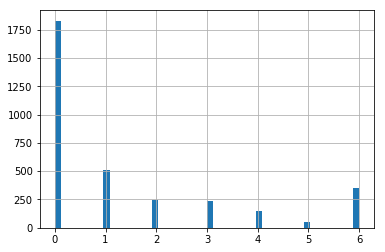

In [175]:
idx_oil.groupby(["Скважина"])["Нефть, т"].transform(lambda a: np.sum(pd.isnull(a))).hist(bins=50)

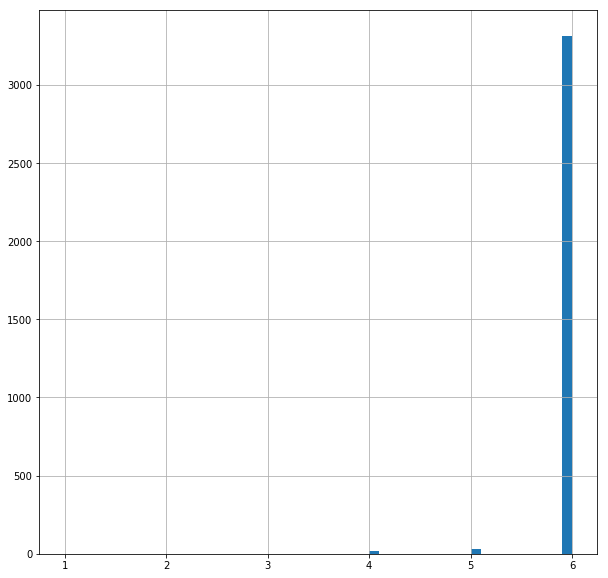

In [188]:
idx_oil.groupby(["Скважина"])["Нефть, т"].transform(lambda a: len(a)).hist(bins=50, figsize=(10,10))

In [190]:
#train first step predictors_here
y_train_clear = y_train[y_train.notnull()]

In [191]:
train_cont.head()

,Характеристический дебит жидкости,Диаметр штуцера,Удельный коэффициент,Глубина текущего забоя,ТП - Забойное давление,Глубина спуска.1,Производительность ЭЦН,Плотность нефти,Мощность ПЭД,Вязкость жидкости в пласт. условиях,Температура пласта,ГП(ИДН) Дебит жидкости,Затрубное давление,Плотность раствора глушения,"Обводненность (вес), %",I X/X,Высота перфорации,ГП(ИДН) Дебит жидкости скорр-ый,JD факт,Глубина верхних дыр перфорации,"Попутный газ, м3",Диаметр экспл.колонны,Вязкость нефти в пластовых условиях,Коэффициент продуктивности,объемный коэффициент,"Дебит попутного газа, м3/сут",ГП(ИДН) Прирост дефита нефти,Частота,ТП - SKIN,Ток рабочий,Давление наcыщения,Давление в линии,Ток номинальный,Динамическая высота,Буферное давление,Замерное забойное давление,Пластовое давление начальное,"Приемистость, м3/сут",Нефтенасыщенная толщина,Глубина спуска,КВЧ,ТП - JD опт.,ГП - Забойное давление,"Простой, ч",Обводненность,"Время работы, ч","Добыча растворенного газа, м3",Давление на приеме,Диаметр дополнительного оборудования,Удлинение,ГП(ГРП) Дебит жидкости скорр-ый,Диаметр НКТ,Газовый фактор,Пластовое давление,Напор,Забойное давление,Плотность воды,ГП(ГРП) Дебит жидкости,Глубина спуска доп. оборудования,"Закачка, м3",К пр от стимуляции
0,429.716226,0.0,6.155860,2458.0,38.388042,0.0,60.0,0.87,100.0,1.669065,87.0,33.796767,25.9,0.656205,"35,2",14.0,13.0,33.796767,0.130662,2387.0,24577.0,146.8,1.67,0.328893,1.12,"792,8",0.499095,50.0,-5.518691,211.0,80.9,24.0,38.5,2271.0,25.0,38.0,231.0,0,6.0,2311.0,82.0,0.642940,34.0,0.0,28.0,744.0,"24576,93",32.0,0.0,34.84,153.714039,67.4,36.0,147.0,2460.0,38.388042,1.03,153.714039,0.0,0.0,1.495868
1,491.506909,0.0,7.041037,2416.0,38.000000,2311.0,60.0,0.87,100.0,1.668832,87.0,33.677317,21.0,0.584782,"42,1",14.0,13.0,33.677317,0.129351,2387.0,22893.0,146.8,1.67,0.376239,1.12,"741,49",0.948523,50.0,-5.456899,211.0,80.9,19.6,38.5,2267.0,20.5,38.0,231.0,0,6.0,2311.0,28.0,0.618373,29.6,3.0,35.0,741.0,"22893,44",0.0,0.0,34.84,147.318018,67.4,36.0,131.0,2460.0,38.000000,1.03,147.318018,0.0,0.0,1.645819
2,544.934423,0.0,7.806408,2416.0,28.588167,2311.0,60.0,0.87,100.0,1.668865,87.0,40.109561,20.0,0.611566,NaN,14.0,13.0,40.109561,0.125107,2387.0,NaN,146.8,1.67,0.417128,1.12,NaN,0.062910,52.0,-5.408689,21.0,80.9,18.0,38.5,2281.0,19.0,0.0,231.0,NaN,6.0,2311.0,270.0,0.600472,28.0,NaN,34.0,NaN,NaN,0.0,0.0,34.84,170.376031,67.4,36.0,137.0,2460.0,28.588167,1.03,170.376031,0.0,NaN,1.771863
3,435.315305,0.0,6.236069,2458.0,37.413236,0.0,60.0,0.87,100.0,1.668999,87.0,31.622997,25.4,0.620494,"35,3",14.0,13.0,31.622997,0.129538,2387.0,23799.0,146.8,1.67,0.333192,1.12,"820,65",0.379405,50.0,-5.512790,211.0,80.9,24.0,38.5,2248.0,25.0,38.0,231.0,0,6.0,2311.0,82.0,0.640510,34.0,0.0,30.0,696.0,"23798,79",31.0,0.0,34.84,143.283728,67.4,36.0,139.0,2460.0,37.413236,1.03,143.283728,0.0,0.0,1.509692
4,490.294664,0.0,7.023671,2416.0,32.802041,2311.0,60.0,0.87,100.0,1.668832,87.0,33.629449,21.4,0.584782,"41,3",14.0,13.0,33.629449,0.126645,2387.0,21172.0,146.8,1.67,0.375311,1.12,"756,14",0.355954,50.0,-5.458045,211.0,80.9,19.4,38.5,2247.0,20.4,0.0,231.0,0,6.0,2311.0,56.0,0.618812,29.4,0.0,35.0,672.0,"21171,91",0.0,0.0,34.84,147.212969,67.4,36.0,131.0,2460.0,32.802041,1.03,147.212969,0.0,0.0,1.642924


In [195]:
train_cont.mean()

Характеристический дебит жидкости         282.887482
Диаметр штуцера                            15.035131
Удельный коэффициент                        3.319725
Глубина текущего забоя                   3341.525210
ТП - Забойное давление                     42.819827
Глубина спуска.1                         1544.199466
Производительность ЭЦН                     86.421573
Плотность нефти                             0.860699
Мощность ПЭД                               25.839189
Вязкость жидкости в пласт. условиях         1.382156
Температура пласта                         91.870856
ГП(ИДН) Дебит жидкости                     39.468976
Затрубное давление                         18.724978
Плотность раствора глушения                 0.785375
Обводненность (вес), %                     24.096047
I X/X                                       1.147056
Высота перфорации                          86.721890
ГП(ИДН) Дебит жидкости скорр-ый            39.468992
JD факт                                     0.

In [246]:
X_train_cont_final, X_val_cont, y_train_final, y_val = train_test_split(train_cont, y_train, test_size=0.2, random_state=42)

In [247]:
ridge = Ridge()
ridge.fit(X_train_cont_final, y_train_final)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [248]:
y_pred=ridge.predict(X_val_cont)